In [1]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
datatrain = pd.read_csv('Insurance Fraud - TRAIN-3000.csv')
datatest = pd.read_csv('Insurance Fraud -TEST-12900.csv')

In [3]:
print(datatrain.shape)
print(datatest.shape)

(2999, 32)
(12918, 32)


In [4]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [5]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918 entries, 0 to 12917
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 12918 non-null  object
 1   WEEKOFMONTH           12918 non-null  int64 
 2   DAYOFWEEK             12918 non-null  object
 3   MAKE                  12918 non-null  object
 4   ACCIDENTAREA          12918 non-null  object
 5   DAYOFWEEKCLAIMED      12918 non-null  object
 6   MONTHCLAIMED          12918 non-null  object
 7   WEEKOFMONTHCLAIMED    12918 non-null  int64 
 8   SEX                   12918 non-null  object
 9   MARITALSTATUS         12918 non-null  object
 10  AGE                   12918 non-null  int64 
 11  FAULT                 12918 non-null  object
 12  POLICYTYPE            12918 non-null  object
 13  VEHICLECATEGORY       12918 non-null  object
 14  VEHICLEPRICE          12918 non-null  object
 15  REPNUMBER             12918 non-null

In [6]:
#To get list of names of all Columns from a dataframe

TrainCols = list(datatrain.columns.values)
TestCols = list(datatest.columns.values)
print(TrainCols)
print(TestCols)

['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']
['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'F

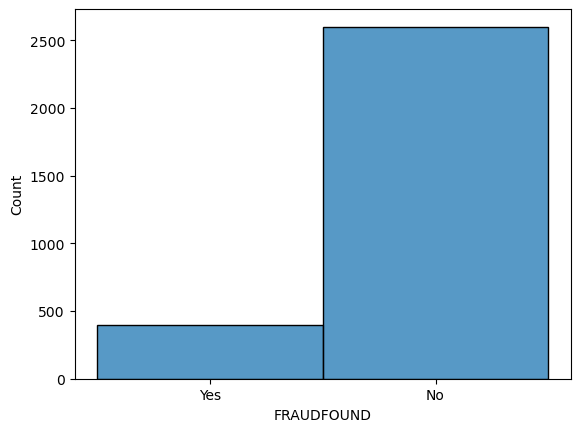

In [7]:
sns.histplot(datatrain["FRAUDFOUND"])
plt.show()
#data shows it is not balanced data

In [8]:
# To check number of null values
datatrain.isna().sum()

MONTH                   0
WEEKOFMONTH             0
DAYOFWEEK               0
MAKE                    0
ACCIDENTAREA            0
DAYOFWEEKCLAIMED        0
MONTHCLAIMED            0
WEEKOFMONTHCLAIMED      0
SEX                     0
MARITALSTATUS           0
AGE                     0
FAULT                   0
POLICYTYPE              0
VEHICLECATEGORY         0
VEHICLEPRICE            0
REPNUMBER               0
DEDUCTIBLE              0
DRIVERRATING            0
DAYS_POLICY_ACCIDENT    0
DAYS_POLICY_CLAIM       0
PASTNUMBEROFCLAIMS      0
AGEOFVEHICLE            0
AGEOFPOLICYHOLDER       0
POLICEREPORTFILED       0
WITNESSPRESENT          0
AGENTTYPE               0
NUMBEROFSUPPLIMENTS     0
ADDRESSCHANGE_CLAIM     0
NUMBEROFCARS            0
YEAR                    0
BASEPOLICY              0
FRAUDFOUND              0
dtype: int64

<Axes: >

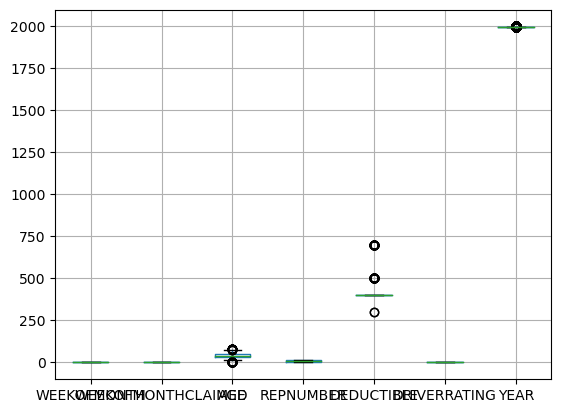

In [9]:
# To check for outliers
datatrain.boxplot()

In [1]:
# Seperate Target column from Train Data
Xtrain = datatrain[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain =datatrain[['FRAUDFOUND']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = datatest[TestCols[0:len(TestCols)-1]].copy()
Ytest = datatest[['QuoteNumber']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

NameError: name 'datatrain' is not defined

In [11]:
#List of Categorical Features
categoricalFeatures = ['MONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'BASEPOLICY']

In [12]:
# OneHotEncoding on Train (fit & transform)
# OneHotEncoding is to be done on Categorical variables.
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=Xtrain.index)
Xtrain = pd.concat([Xtrain,Xcat],axis=1)
Xtrain.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtrain.sample(5)

/Users/tristahsu/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,MONTH_Apr,MONTH_Aug,MONTH_Dec,...,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability
2953,1,2,46,13,400,2,1996,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2536,1,1,29,9,400,2,1996,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2965,2,2,31,1,400,2,1995,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
427,3,5,21,12,400,1,1995,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2626,3,3,32,10,400,1,1996,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# OneHotEncoding on Test (only transform)
# OneHotEncoding is to be done on Categorical variables.
Xcat = pd.DataFrame(ohe.transform(Xtest[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=Xtest.index)
Xtest = pd.concat([Xtest,Xcat],axis=1)
Xtest.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtest.sample(5)

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,MONTH_Apr,MONTH_Aug,MONTH_Dec,...,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability
11064,1,2,29,2,400,1,1994,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6683,2,2,49,14,400,4,1994,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12126,1,2,28,2,400,3,1994,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5949,4,4,37,11,400,4,1994,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10517,4,4,50,11,400,1,1995,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain.values.ravel())

DecisionTreeClassifier()

In [15]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier()

In [16]:
X_Pred = dt.predict(Xtest)
XPred = dt.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8844248335655674
Confusion Matrix for Decision Tree:
[[10977  1443]
 [   50   448]]
Max Depth 24
Leaf 289
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       1.00      0.88      0.94     12420
         Yes       0.24      0.90      0.38       498

    accuracy                           0.88     12918
   macro avg       0.62      0.89      0.66     12918
weighted avg       0.97      0.88      0.91     12918



In [17]:
X_Pred1 = rf.predict(Xtest)
XPred1 = rf.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred1))

Train Accuracy: 1.0
Test Accuracy: 0.9614491407338597
Confusion Matrix for Decision Tree:
[[12002   418]
 [   80   418]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.99      0.97      0.98     12420
         Yes       0.50      0.84      0.63       498

    accuracy                           0.96     12918
   macro avg       0.75      0.90      0.80     12918
weighted avg       0.97      0.96      0.97     12918



In [18]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={'min_samples_leaf' : range(6,600,40),'max_depth': 
            range(2,10,2),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 86, 'max_depth': 8, 'criterion': 'gini'}
accuracy Score for Decision Tree:0.921427
--- 1.3084852695465088 seconds ---


In [19]:
import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6}
accuracy Score for Decision Tree:0.929246
--- 5.924422264099121 seconds ---


In [20]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [21]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.921427465551943
Confusion Matrix for Decision Tree:
[[11818   602]
 [  413    85]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.95      0.96     12420
         Yes       0.12      0.17      0.14       498

    accuracy                           0.92     12918
   macro avg       0.54      0.56      0.55     12918
weighted avg       0.93      0.92      0.93     12918

[0.75961538 0.72307692 0.55       0.5        0.57594937]


In [22]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')

Test Accuracy: 0.9292460133147546
Confusion Matrix for Decision Tree:
[[11865   555]
 [  359   139]]
Printing the precision and recall, among other metrics


In [23]:
import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={'min_samples_leaf' :range(10,100,10) ,'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain.values.ravel())
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 20, 'min_samples_leaf': 20, 'max_features': 30, 'max_depth': 9}
accuracy Score for Decision Tree:0.926150
--- 5.750277042388916 seconds ---


In [24]:
import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters)
rf_grid.fit(Xtrain, Ytrain.values.ravel())
grid_parm1=rf_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 10, 'n_estimators': 30}
accuracy Score for Decision Tree:0.927620
--- 96.82888889312744 seconds ---


In [25]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rfRand = RandomForestClassifier(**grid_parm)
rfGrid = RandomForestClassifier(**grid_parm1)

rfRand.fit(Xtrain,Ytrain.values.ravel())
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain.values.ravel())
rfGrid_predict = rfGrid.predict(Xtest)

In [26]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain.values.ravel(), cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9404706610930484
Confusion Matrix for Decision Tree:
[[12044   376]
 [  393   105]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     12420
         Yes       0.22      0.21      0.21       498

    accuracy                           0.94     12918
   macro avg       0.59      0.59      0.59     12918
weighted avg       0.94      0.94      0.94     12918

[0.72836538 0.67788462 0.54375    0.5        0.5443038 ]


In [38]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.9278526087629664
Confusion Matrix for Decision Tree:
[[11868   552]
 [  380   118]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.96      0.96     12420
         Yes       0.18      0.24      0.20       498

    accuracy                           0.93     12918
   macro avg       0.57      0.60      0.58     12918
weighted avg       0.94      0.93      0.93     12918

